# Taek Soo Nam

## CS344 (Final Project)

For the final project, I built a model that uses K-means Cluster Analysis to analyze Service Express' data. The purpose of this project is to know which customers Service Express should keep an eye on. Service Express' revenue comes from by insuring its customers' hardware devices. The dataset from Service Express that I use consists of different types of revenues from different revenues. However, the key columns will be COGSPercent and DeletionPercent. COGSPercent shows the percentage of the cost that Service Express pays to repair broken devices of the customers. DeletionPercent shows the percentage how many customers have ended the contracts with Service Express on different number of devices. 

I will set a threshold to analyze the customers who have high COGSPercent and DeletionPercent. If percentages are above 10% then Service Express starts to take notice of those customers. For example, Service Express may increase the contract amount for the device being insured when certain customer has high COGSPercent. It may also not provide services to customers who have high DeletionPercent.

In analyzing which customers have high COGSPercent or DeletionPercent, we can use SQL queries to do calculation. However, as I am dealing with more variables, using K-Means function is more efficient. Therefore, I decided to use K-means Clustering method to analyze.

In terms, of the model, it is built in Python that uses K-means function. K-means clustering is one of data mining methods. The clusters group the data that have similar categories. For example, there will be one cluster that has high deletion percentage, and one cluster that has low deletion percentage. I have implemented the tutorial on online(Mubaris.com), and modified some of it in order for the model to give the best output with the given dataset.

In [7]:
# Importing the library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Setting figure size and using ggplot for plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [20]:
# Import dataset
data = pd.read_csv('Cluster Analysis.csv', encoding='cp1252')
print(data.shape)
print(data.head())

(6211, 22)
  Customer                                     DeletionReason  SystemRevenue  \
0        A                      9% Customer Loyalty Discount.      406020.60   
1        B                                     Decommissioned      244183.00   
2        C             8% discount approved at renewal time.       192916.64   
3        D  4.20.18 - Per Chris, TierPoint moving these ba...      357396.50   
4        E  Did not replace servers. Hitachi AMS (x2) will...      301893.00   

   StorageRevenue  NetworkRevenue  OtherRevenue  VMAXRevenue  NonVMAXRevenue  \
0       566390.59        13616.64        358.56          0.0       986386.39   
1       551958.40        73982.52      16780.28     274685.0       612219.20   
2       254232.61       191461.13      20089.05          0.0       658699.43   
3       205044.00       132287.40      43375.00          0.0       738102.90   
4       237188.50        27878.00      34688.00          0.0       601647.50   

   DeletionAmount  TotalRev

In [12]:
# Rearranging the data to array
f1 = data['COGSPercent'].values
f2 = data['DeletionPercent'].values
X = np.array(list(zip(f1,f2)))

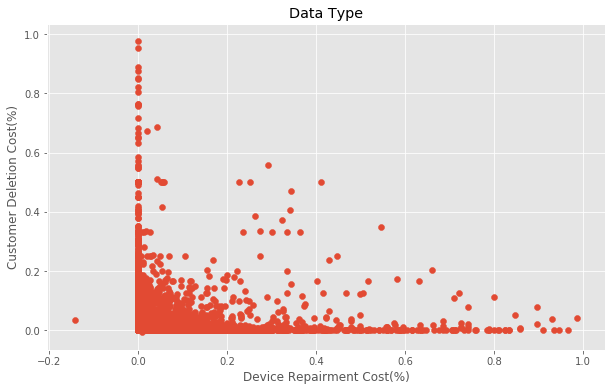

In [13]:
# Showing the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Device Repairment Cost(%)')
plt.ylabel('Customer Deletion Cost(%)')
plt.title('Data Type')
plt.show()

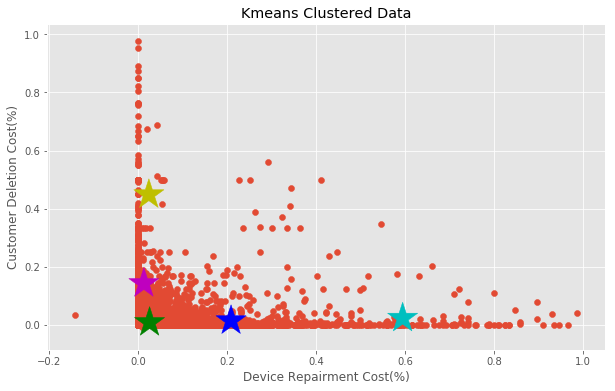

In [14]:
# Initializing KMeans with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fitting with inputs
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

# Getting the cluster centers/centroids
C = kmeans.cluster_centers_
fig = plt.figure()

# Setting colors for centroids
colors = ['g', 'b', 'y', 'c', 'm']

# Plotting the graph with calculated centroids
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.xlabel('Device Repairment Cost(%)')
plt.ylabel('Customer Deletion Cost(%)')
plt.title('Kmeans Clustered Data')
plt.show()

This output shows the unsupervised learned clusters, which got assigned to different data values.
The Green star has customers that have low COGSPercent and low DeletionPercent.
The Blue star has customers that have high low COGS Percent but high DeletionPercent.
The Maroon star has customers that have high COGS Percent but low DeletionPercent.
The Skyblue star has customers that have low COGS Percent but high DeletionPercent.
The Yellow star has customers that have high COGS Percent but low DeletionPercent.

I have took this output into csv and made a summary page in excel.

In [ ]:
# Converting back the data to data frame with assigned clusters (0~4).
cluster = kmeans.labels_
ang = pd.DataFrame(data)
ang['cluster'] = np.nan
ang['cluster'] = cluster

# Output
ang.to_csv('./Kmeans Output', sep=',', index=False)

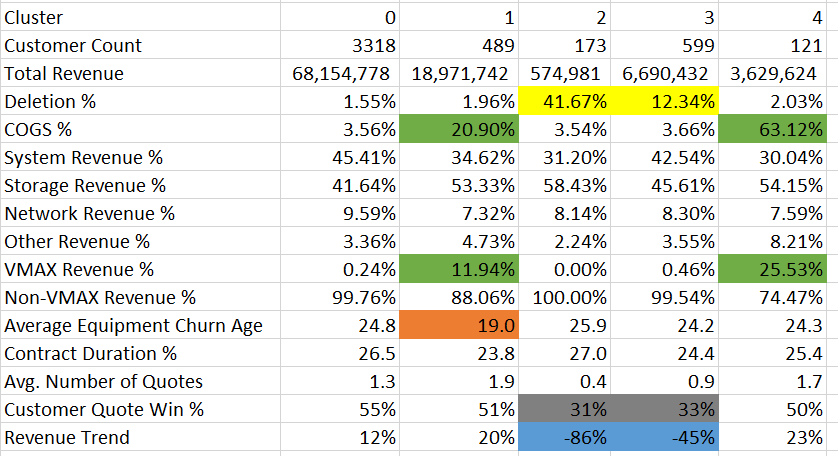

After running the Kmeans model, I have created a summary page that calculates the different types of revenue. As you can see, cluster 2 and 3 have high DeletionPercentage and 1 and 4 have high COGSPercentage. 

Looking at the data, I was able to find that VMAX Revenue is associated with high COGSPercentage. This means, when an VMAXequipment is broken, the cost to repair the device is usually higher than the cost to repair other types of devices. Therefore, Service Express will likely to insure VMAX devices on higher cost to customers who have VMAX equipment in the future. The price increase and the decision will be made in the leadership positions.

In terms of clusters that have high DeletionPercentage, I was curious of reasons why certain customers are more likely to leave than other customers in the other clusters. Looking through some ways to do so, I came across of using Topic Modeling, specifically LDA. 

Latent Dirichlet Allocation (LDA) is an algorithm that is used to discover the topics that are present in a corpus(Bhakaria). 
It is able to return the documents that belong to a topic in a corpus and the words that belong to a topic. LDA is based on probabilistic graphical modeling It takes as input a bag of words matrix (i.e., each document represented as a row, with each columns containing the count of words in the corpus). The aim of the algorithm is then to produce 2 smaller matrices; a document to topic matrix and a word to topic matrix that when multiplied together reproduce the bag of words matrix with the lowest error. Because LDA does not choose the number of topics by itself, I will choose 5 topics for LDA to generate.

The LDA model that I will build should give topics of the reasons of customers who end their contracts with Service Express. The key column that was used was DeletionReason, which has information that customers have provided reasons of ending the contract. To compare this in an interesting way, I compared DeletionReason in each cluster that was assigned from the Kmeans Output. In the middle of the process, I have added extra stopwords, because if not, the LDA would only generate those words due to the amount of the occurrences of the words in the DeletionReason column. Then, I have unified with the built-in stopwords from CountVectorizer function.

In [15]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [18]:
# Import each cluster dataset from Kmeans Output
dataset0 = pd.read_csv('Cluster 0.csv')
dataset1 = pd.read_csv('Cluster 1.csv')
dataset2 = pd.read_csv('Cluster 2.csv')
dataset3 = pd.read_csv('Cluster 3.csv')
dataset4 = pd.read_csv('Cluster 4.csv')

# Here, I just changed each dataset after printing out results for each cluster.
documents = dataset0
no_features = 1000

# Downloading stopwords from nltk
nltk.download('stopwords')
stop_words = stopwords.words("english")

# Adding stopwords
more_stop = ['18', 'decommissioned', 'customer', 'longer', 'kb']
stop_words.extend(more_stop)


# LDA
tf_vectorizer = CountVectorizer(max_df=1, min_df=1, max_features=no_features, stop_words=text.ENGLISH_STOP_WORDS.union(stop_words))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

# Choosing number of topics
no_topics = 5


# RUN LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=10, learning_method='online', learning_offset=50., random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsnam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Topic 0:
downreplaced vnx5300customer items audit turned demmissioneddecommissioned1 17 incorrect node cancelled
Topic 1:
equipment added workload effective using wade new time 194 ams
Topic 2:
equipment agreement hardware new ck service replacing warranty added servers
Topic 3:
swcustomer opportunity 157 paid came new buy richmond joel hopefully
Topic 4:
user hardware philips purposed cancel equipmentdecommissioned3 13server starting correction cost


C:\Users\tsnam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Cluster 0

Topic 0:
downreplaced vnx5300customer items audit turned demmissioneddecommissioned1 17 incorrect node cancelled

Topic 1:
equipment added workload effective using wade new time 194 ams

Topic 2:
equipment agreement hardware new ck service replacing warranty added servers

Topic 3:
swcustomer opportunity 157 paid came new buy richmond joel hopefully

Topic 4:
user hardware philips purposed cancel equipmentdecommissioned3 13server starting correction cost

Cluster 1

Topic 0:
wlcgtc01 use moved 309 higherno gear11 maintenance engine local 10

Topic 1:
hi exec sghas opp power results 16 items soon neededowned

Topic 2:
user sales productions ken kb12 domains storage supportremoving maintained 
hardwarethere

Topic 3:
agreement agmt equipment cisco delete k9 server oem service techdata

Topic 4:
agreement 250 cranel moved discount brought scanners remaining add thank

**Cluster 2**

**Topic 0:
user know renewingnot jeff year reason continue equipment stored discuss**

**Topic 1:
equipment renew house month 16 providers kbcustomer support sparc rpper**

**Topic 2:
equipment end partner renewing renew techdata agreements service sei candace**

**Topic 3:
emails deleting future hardwarethis transition end emc process gary surgery**

**Topic 4:
equipment user renewing renew end agreement techdata hardware partner said**

**Cluster 3**
**Topic 0:
10 bvcustomer sis agreement datablue refreshed 17 terri gartner way**

**Topic 1:
equipment agreement partner service hardware said 10 renewing oem park**

**Topic 2:
partner equipment service agreement refreshed hardware data moving replaced renewal**

**Topic 3:
equipment pay scaws expiration came bvgreat kbrefreshed gear decision great**

**Topic 4:
equipment agreement partner hardware 10 warranty service place 8217 agmt**

Cluster 4

Topic 0:
equipment new gear replaced removed replacing hardware added agreement servers

Topic 1:
ryan robert based sites services said utilizing com12 replaced replacereplaced

Topic 2:
equipment hp replacing service new hardware agreement using netapps geardecommissionedcustomer

Topic 3:
equipment replaced servers reduce solaris location budget licenses added blade

Topic 4:
equipment new added gear replacing hardware agreement removed servers using


I have marked the output of clusters that have high DeletionPercentage as bold. Cluster 2 has the highest DeletionPercentage, and Cluster 3 has a quite high DeletionPercentage as well. The common words that appear for all the clusters are 'equipment', 'replaced', 'agreement', 'renew'. This means that the common reason a customer deletes Service Express contracts may be due to replacing with different equipment. Also, customers may not just renew the agreement. The reason 'not' is in the list is because 'not' is considered as one of the stopwords. This can be shown through using the code:

from sklearn.feature_extraction import stop_words
print(stop_words.ENGLISH_STOP_WORDS).

Some of the words that contain only in Cluster 2 and 3 are:

partner
discuss
reason
refrehsed

These words are actually helpful when analyzing the reasons for deletion. 'Partner' refers to Service Express' partner company that brings customers to Service Express, since the partner does not have a service that it could provide to its customers. Therefore, the partner gets some sort of revenue for connecting its customer and Service Express. Sometimes, partners notify Service Express that its customers do not want to renew the contract. That is when service for insuring devices end.

For 'discuss', Service Express would first discuss whether the customers would like to renew the equipment. However, some customers do not pick up calls or refuse to discuss. That is when the contract just ends. Service Express will look into history of these types of customers and see what kind of service Service Express provided to these types of customers. Service Express will also analyze the relationship with these customers as well.

'Reason' is similar to discuss, except customers will just not have a reason when ending the contract.

'Refreshed' is when customers update their devices and therefore no longer need service from Service Express. That is because when the customers buy new equipments, those equipments are likely to come with warranty. Therefore, they do not need to pay extra fee to insure their equipments from other company.

With these results from LDA, Service Express can start figuring out ways to come up with better contract deals with their customers. For example, Service Express can replace the device at a lower price than usual for customers who are likely to 'refresh' their equipments. For 'partners,' we can collect data from our partners and run similar models for their customers and share our results with them, so that they also know the customers that are more likely to leave than others.

One improvement, however, can make is the 'discuss', or 'reason'. Because customers are do not necessarily have to give reasons why they are leaving Service Express, there is a possibility of having a reporting bias. Service Express should come up with business solutions to better analyze the behaviors of the customers.

The methods of using Kmeans and LDA were were applied in business problems. These methods can be used in different ways. However, as programmers or as users of these models, we have to be mindful about the social and ethical implications. These technologies can bring positive effects on business, research (especially qualitative research), academics, etc. On the other hand, these tools can be manipulated depending on who implement them for which purposes. For the tools that I use for this specific business project, I intend to bring better service to customers, better relationships with them through Service Express. My hope is that Service Express gives great service to its customers and insure their hardware devices at affordable prices and better deals, which can bring a win-win situation for both.

References:

Kmeans Tutorial
https://mubaris.com/posts/kmeans-clustering/

Topic Modeling Tutorial
https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

Scikit learn documentation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Unifying stopwords in CountVectorizer function
https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/37679
